In [1]:
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
dataset = pd.read_csv('../input/indian-food-101/indian_food.csv')
display(dataset)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
dataset[dataset.region.isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [5]:
dataset.region.fillna('North',inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
dataset[dataset.state == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


In [8]:
dataset.iloc[7:8,7]= dataset.iloc[7:8,7].replace('-1','Rajasthan') #Kaju katli
dataset.iloc[9:10,7]= dataset.iloc[9:10,7].replace('-1','Orissa') #Kheer
dataset.iloc[10:11,7]= dataset.iloc[10:11,7].replace('-1','Uttar Pradesh') #Laddu
dataset.iloc[12:13,7]= dataset.iloc[12:13,7].replace('-1','Gujarat') #Nankhatai
dataset.iloc[94:95,7]= dataset.iloc[94:95,7].replace('-1','Delhi') #Khichdi
dataset.iloc[96:97,7]= dataset.iloc[96:97,7].replace('-1','Andra Pradesh') #Kulfi falooda
dataset.iloc[98:99,7]= dataset.iloc[98:99,7].replace('-1','Bihar') #Lauki ki subji
dataset.iloc[109:110,7]= dataset.iloc[109:110,7].replace('-1','Uttar Pradesh') #Pani Puri
dataset.iloc[111:112,7]= dataset.iloc[111:112,7].replace('-1','Maharastra') #Papad
dataset.iloc[115:116,7]= dataset.iloc[115:116,7].replace('-1','Maharastra') #Rajma Chaval
dataset.iloc[117:118,7]= dataset.iloc[117:118,7].replace('-1','Delhi') #Samosa
dataset.iloc[128:129,7]= dataset.iloc[128:129,7].replace('-1','Tamil Nadu') #Dosa
dataset.iloc[130:131,7]= dataset.iloc[128:129,7].replace('-1','Tamil Nadu') #Idli
dataset.iloc[144:145,7]= dataset.iloc[144:145,7].replace('-1','Karnataka') #Masala Dosa
dataset.iloc[145:146,7]= dataset.iloc[145:146,7].replace('-1','Andhra Pradesh') #Pachadi
dataset.iloc[149:150,7]= dataset.iloc[149:150,7].replace('-1','Andhra Pradesh') #Payasam
dataset.iloc[154:155,7]= dataset.iloc[154:155,7].replace('-1','Kerala') #Rasam
dataset.iloc[156:157,7]= dataset.iloc[156:157,7].replace('-1','Tamil Nadu') #Sambar
dataset.iloc[158:159,7]= dataset.iloc[158:159,7].replace('-1','Bihar') #Sevai
dataset.iloc[161:162,7]= dataset.iloc[161:162,7].replace('-1','Tamil Nadu') #Uttapam
dataset.iloc[162:163,7]= dataset.iloc[162:163,7].replace('-1','Tamil Nadu') #Vada
dataset.iloc[164:165,7]=dataset.iloc[164:165,7].replace('-1','Andhra Pradesh') #Upma
dataset.iloc[231:232,7]=dataset.iloc[231:232,7].replace('-1','Tamil Nadu') # Brown Rice
dataset.iloc[248:249,7]=dataset.iloc[248:249,7].replace('-1','Tamil Nadu') # Red Rice

In [9]:
#Changing NCT of Delhi to Delhi
dataset.iloc[76:77,7]=dataset.iloc[76:77,7].replace('NCT of Delhi','Delhi') # Red Rice

In [10]:
dataset[dataset.region == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Rajasthan,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Orissa,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,Uttar Pradesh,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,Gujarat,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,Delhi,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,Andra Pradesh,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,Bihar,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,Uttar Pradesh,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,Maharastra,-1
117,Samosa,"Potatoes, green peas, garam masala, ginger, dough",vegetarian,30,30,spicy,snack,Delhi,-1


In [11]:
dataset.iloc[7:8,8]= dataset.iloc[7:8,8].replace('-1','North') # Kaju katli
dataset.iloc[9:10,8]=dataset.iloc[9:10,8].replace('-1','North') # Kheer
dataset.iloc[10:11,8]=dataset.iloc[10:11,8].replace('-1','North') # Laddu
dataset.iloc[12:13,8]=dataset.iloc[12:13,8].replace('-1','West') # Nankhatai
dataset.iloc[94:95,8]= dataset.iloc[94:95,8].replace('-1','North') # Khichdi
dataset.iloc[96:97,8] = dataset.iloc[96:97,8].replace('-1','South') # Falooda
dataset.iloc[98:99,8]= dataset.iloc[98:99,8].replace('-1','East') # Lauki ki subji
dataset.iloc[109:110,8]= dataset.iloc[109:110,8].replace('-1','North') # Pani Puri
dataset.iloc[111:112,8]=dataset.iloc[111:112,8].replace('-1','South') # Pappad
dataset.iloc[117:118,8]=dataset.iloc[117:118,8].replace('-1','North') #samosa
dataset.iloc[164:165,8]=dataset.iloc[164:165,8].replace('-1','South') #Upma
dataset.iloc[231:232,8]=dataset.iloc[231:232,8].replace('-1','South') # Brown Rice
dataset.iloc[248:249,8]=dataset.iloc[248:249,8].replace('-1','South') # Red Rice

In [12]:
display(dataset[dataset.prep_time == -1])
print(len(dataset[dataset.prep_time == -1]))

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West


30


In [13]:
# Replacing NA values in the columns 'prep_time' and 'cook_time' with zero
dataset['prep_time']=dataset['prep_time'].replace(-1,0)
dataset['cook_time']=dataset['cook_time'].replace(-1,0)

In [14]:
print('Average Preparation Time:',round(dataset['prep_time'].mean()))
print('Average Cook Time:',round(dataset['cook_time'].mean()))

Average Preparation Time: 31
Average Cook Time: 35


In [15]:
# Replacing the NA values with average values
dataset['prep_time']=dataset['prep_time'].replace(0,30)
dataset['cook_time']=dataset['cook_time'].replace(0,35)

In [16]:
dataset.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,34.752941,38.482353
std,71.618341,46.634264
min,5.000000,2.000000
25%,10.000000,25.000000
50%,15.000000,30.000000
75%,30.000000,40.000000
max,500.000000,720.000000


In [17]:
dataset[dataset.flavor_profile == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,-1,main course,Maharashtra,West
104,Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,-1,main course,Punjab,North
116,Rongi,"Garam masala powder, tomato, kasuri methi, cin...",vegetarian,10,30,-1,main course,Punjab,North
131,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,-1,snack,Kerala,South
145,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",vegetarian,10,25,-1,main course,Andhra Pradesh,South
146,Paniyaram,"Yogurt, ginger, curry leaves, baking soda, gre...",vegetarian,10,20,-1,main course,Tamil Nadu,South
150,Paruppu sadam,"Arhar dal, sambar powder, tomato, curry leaves...",vegetarian,10,20,-1,main course,Tamil Nadu,South
153,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",vegetarian,10,20,-1,main course,Tamil Nadu,South
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120,60,-1,main course,Karnataka,South


In [18]:
dataset.iloc[116:117,5] = dataset.iloc[116:117,5].replace('-1','spicy') #Rongi
dataset.iloc[131:132,5] = dataset.iloc[131:132,5].replace('-1','spicy') #Kanji
dataset.iloc[146:147,5] = dataset.iloc[146:147,5].replace('-1','sweet') #Paniyaram
dataset.iloc[153:154,5] = dataset.iloc[153:154,5].replace('-1','sour') #Puli Sadham
dataset.iloc[155:156,5] = dataset.iloc[155:156,5].replace('-1','sweet') #Puttu
dataset.iloc[159:160,5] = dataset.iloc[159:160,5].replace('-1','sour') #Thayir Sadham
dataset.iloc[160:161,5] = dataset.iloc[160:161,5].replace('-1','spicy') #Theeyal
dataset.iloc[176:177,5] = dataset.iloc[176:177,5].replace('-1','sweet') #Copra Paak
dataset.iloc[179:180,5] = dataset.iloc[179:180,5].replace('-1','spicy') #Dahi Vada
dataset.iloc[228:229,5] = dataset.iloc[228:229,5].replace('-1','spicy') #Bilahi Maas
dataset.iloc[231:232,5] = dataset.iloc[231:232,5].replace('-1','spicy') #Brown Rice
dataset.iloc[236:237,5] = dataset.iloc[236:237,5].replace('-1','spicy') #Chingri Bhape
dataset.iloc[244:245,5] = dataset.iloc[244:245,5].replace('-1','spicy') #Pakhala
dataset.iloc[248:249,5] = dataset.iloc[248:249,5].replace('-1','spicy') #Red Rice

In [19]:
dataset['flavor_profile'] = dataset['flavor_profile'].replace('-1', 'savour')

In [20]:
dataset.flavor_profile.value_counts()

spicy     142
sweet      91
savour     15
bitter      4
sour        3
Name: flavor_profile, dtype: int64

In [21]:
fla_vals = [142,91,15,4,3]
fla_labels = ['spicy','sweet','savour','bitter','sour']

Text(0.5, 1.0, 'Flavor Profile of various flavors in India')

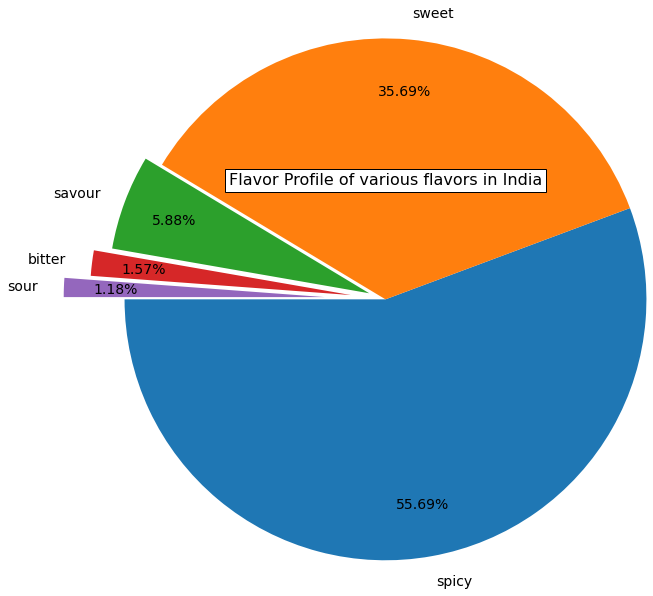

In [22]:
plt.axis('equal')
plt.pie(fla_vals, labels = fla_labels,textprops={'fontsize': 14}, radius = 3, autopct = '%0.2f%%',pctdistance = 0.8, explode = [0,0,0.2,0.4,0.7],startangle = 180)
plt.title('Flavor Profile of various flavors in India', bbox={'facecolor':'1'},fontsize='16')

## Flavor Profile of India

#### Inference:
<li>Dishes with spicy flavor is present maximum in India
<li>Indians are fond of sweets and spicy foods
<li>Dishes with sour flavor profile is present the least in India, backed by bitter flavor

<Figure size 7200x1440 with 0 Axes>

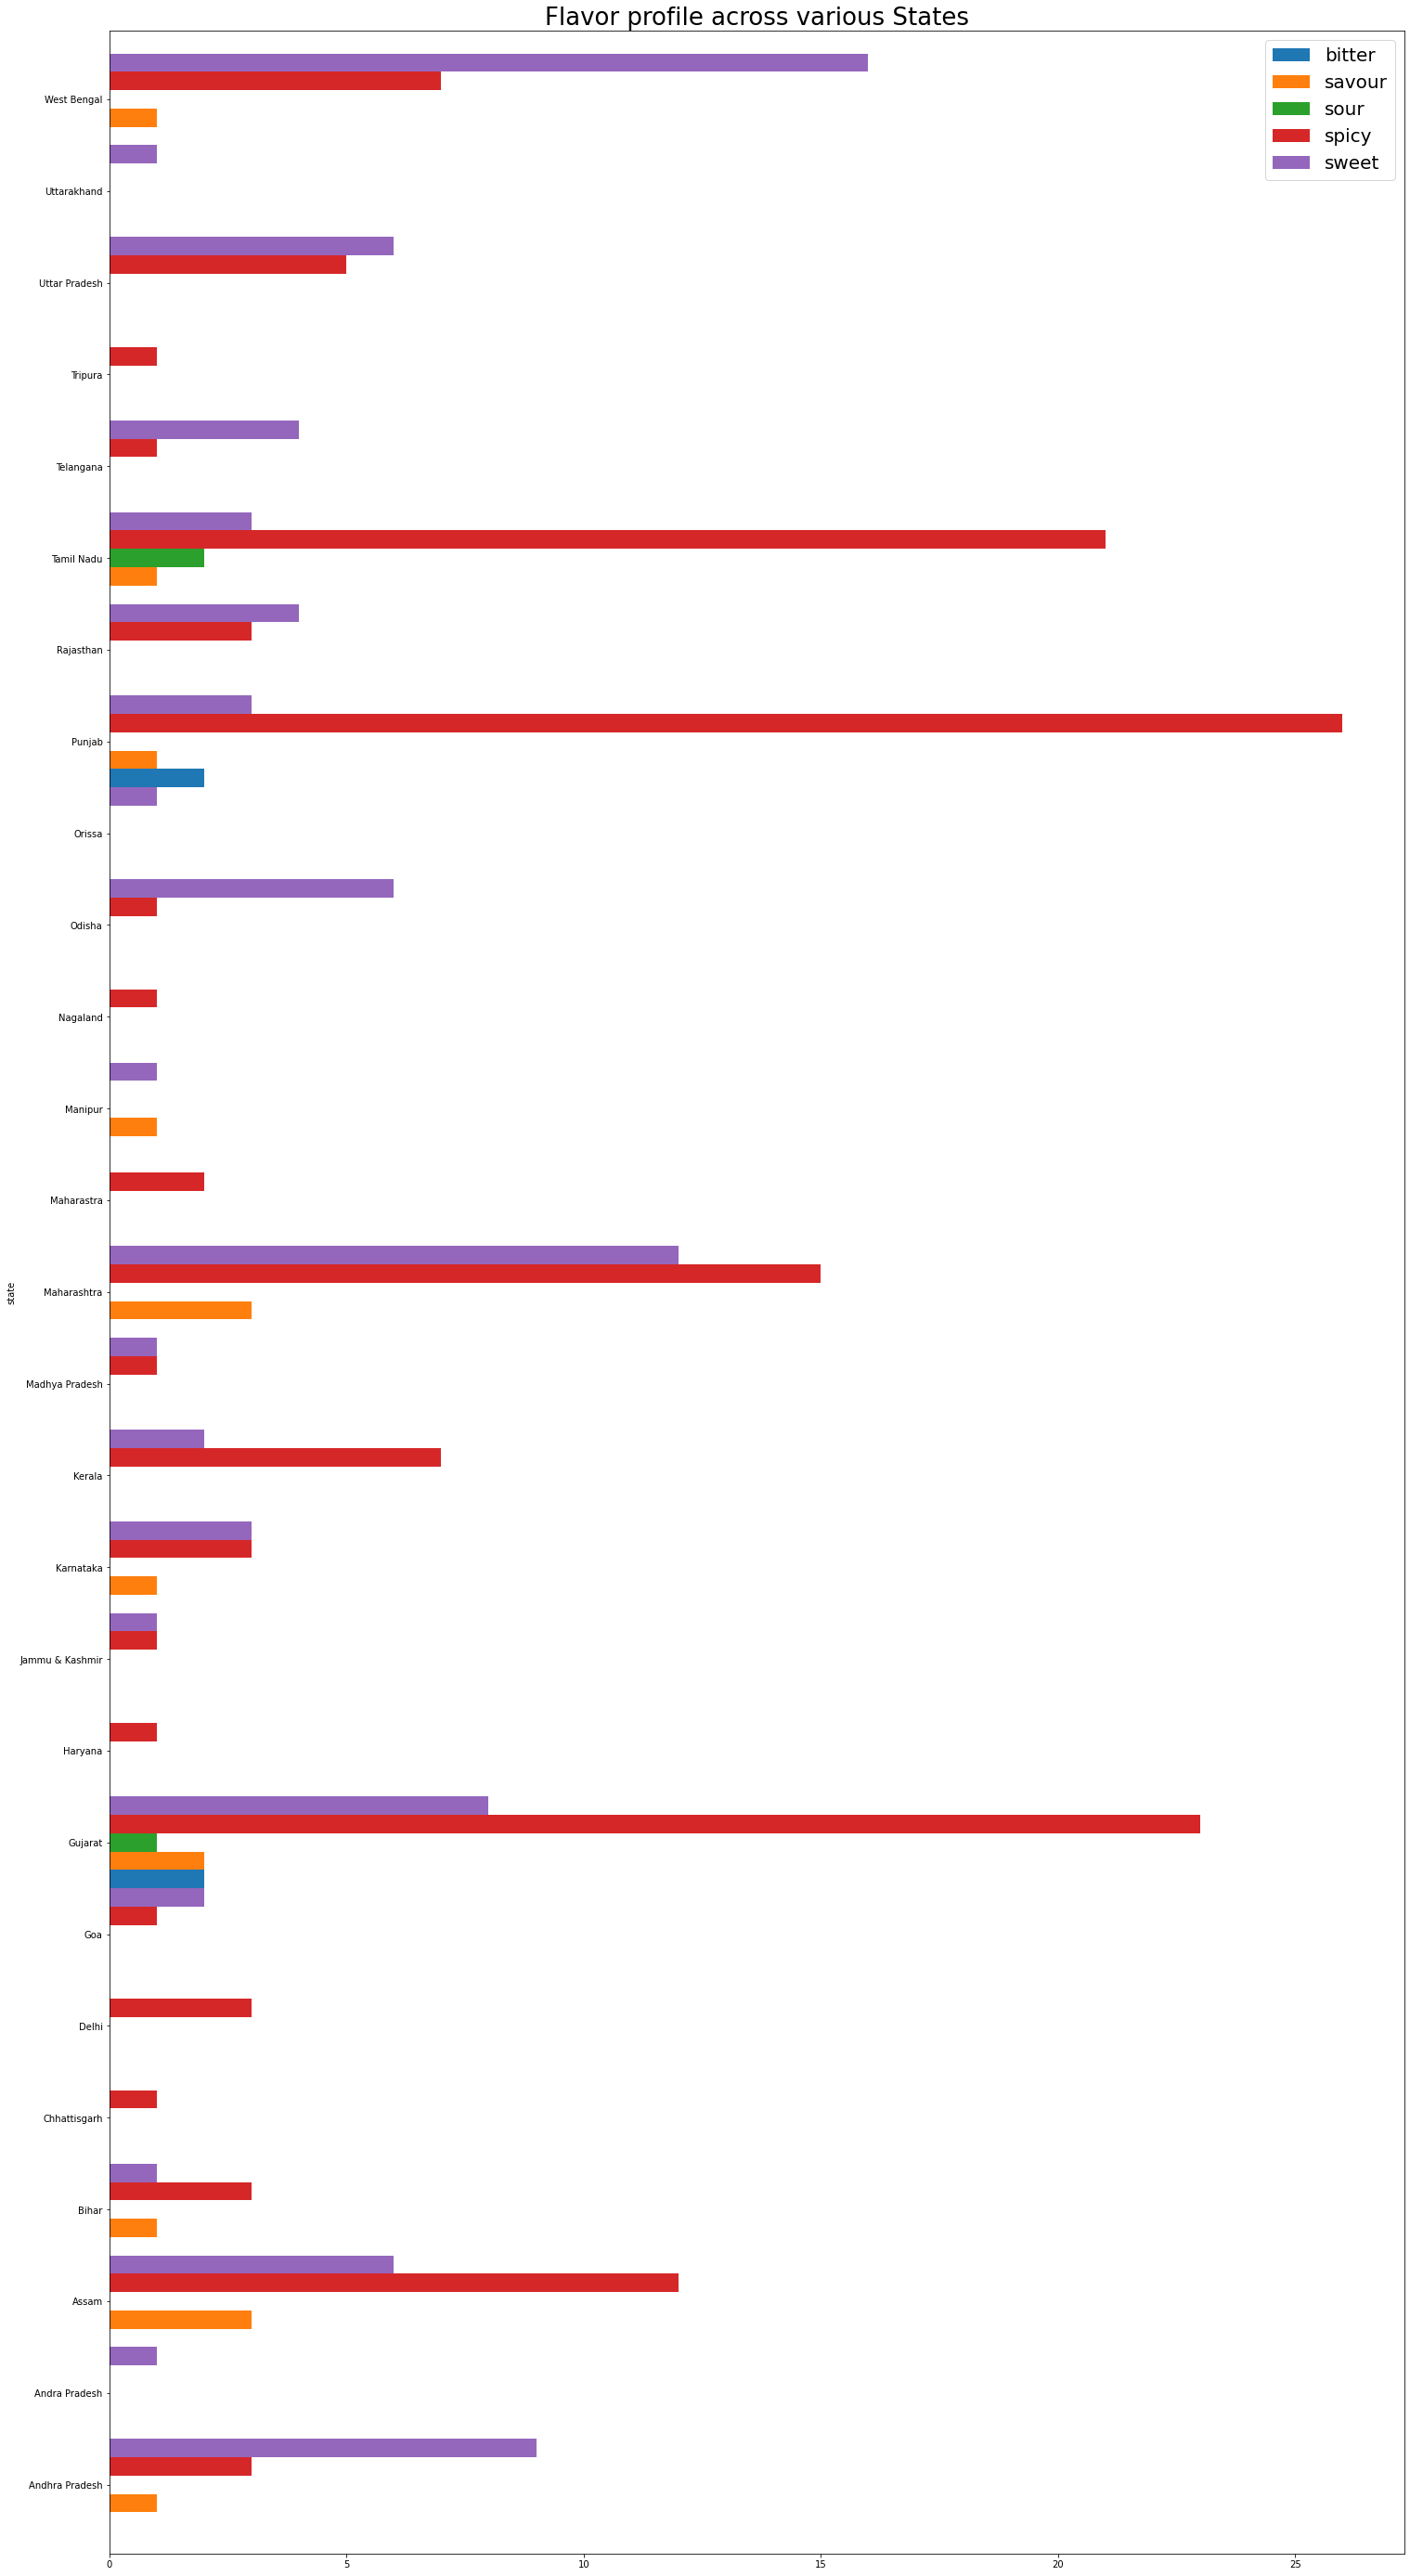

In [23]:
plt.figure(figsize = (100,20))
pd.crosstab(dataset['state'],dataset['flavor_profile']).plot(kind = 'barh', figsize = (25,50),width = (1))
plt.title('Flavor profile across various States',fontsize = 26)
plt.rc('xtick', labelsize=26) 
plt.rc('ytick', labelsize=25)
plt.legend(fontsize = 20)

#### Inference:
<li>Punjab has the highest number of spicy dishes
<li>West Bengal has the highest number of sweets
<li>Maharastra and Assam contributes to the major portion of savouries    
<li>Tamil Nadu and Gujarat only contributes to the total sour dishes available
<li>Punjab and Gujarat only contributes to the total bitter dishes available

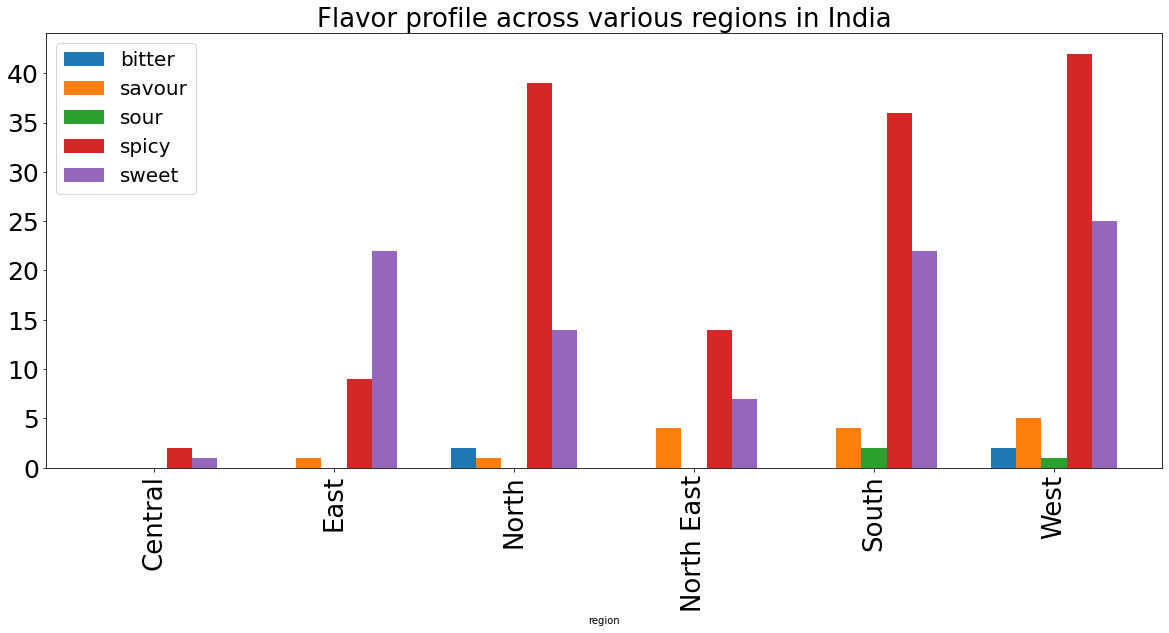

In [24]:
pd.crosstab(dataset['region'],dataset['flavor_profile']).plot(kind = 'bar',figsize = (20,8),width = (0.7))
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=19)
plt.title("Flavor profile across various regions in India", fontsize = 26)
plt.legend(fontsize = 20)

#### Inference:
<li>Regions in the west has most of the spicy dishes,sweets and savouries
<li>Regions int the south has most of the sour dishes
<li>South and West regions only contribute to the total sour dishes available
<li>North and West regions only contribute to the total bitter dishes available

In [25]:
dataset.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

<AxesSubplot:xlabel='cook_time', ylabel='flavor_profile'>

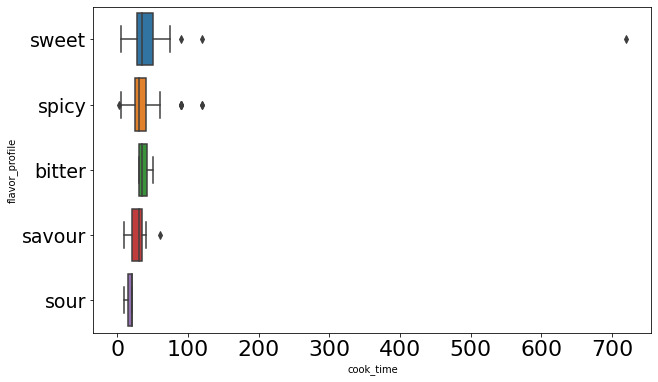

In [26]:
plt.figure(figsize = (10,6))
sns.boxplot(data = dataset, x = 'cook_time', y = 'flavor_profile')

#### Inference:
<li>Most of the dishes takes below 100 min to cook and prepare
<li>Outliers have either high preparation time or high cook time, but not both